In [2]:
import matplotlib 
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import numpy as np

%matplotlib notebook

In [3]:
def nc_weight(xi, kappa, wr):
    temp_xi_xj = []
    for xj in nb:
        temp_xi_xj.append(np.linalg.norm(np.array([xi[0], xi[1]])-np.array([xj[0], xj[1]])))
    
    return (1 + kappa*(1-(min(temp_xi_xj)/wr)))/(1+kappa)

In [4]:
# collocation points
nc = []
omega = np.arange(0.1, 1.0, 0.1)
for x0 in omega:
    for x1 in omega:
        nc.append((x0, x1))
        
# boundary points
nb = []
nby = np.hstack((np.zeros(10), np.arange(0.0, 1.0, 0.1), np.ones(10), np.arange(1.0, 0.0, -0.1)))
nbx = np.hstack((np.arange(0.0, 1.0, 0.1), np.ones(10), np.arange(1.0, 0.0, -0.1), np.zeros(10)))
for i in range(40):
    nb.append((nbx[i], nby[i]))

In [5]:
temp_denominator = []
for xk in nc:
    temp_xk_xj = []
    for xj in nb:
        temp_xk_xj.append(np.linalg.norm(np.array([xk[0], xk[1]])-np.array([xj[0], xj[1]])))
    temp_denominator.append(min(temp_xk_xj))

wr = max(temp_denominator)


xi = []
for x in nc:
    xi.append(nc_weight(x, 1, wr))

<IPython.core.display.Javascript object>


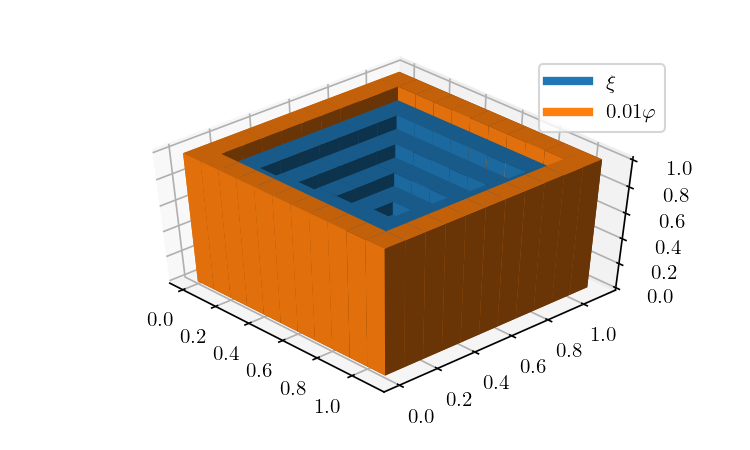

In [25]:
# setup the figure and axes
fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(0.1, 1.0, 0.1)
_y = np.arange(0.1, 1.0, 0.1)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
x_b = np.asarray([x for x,y in nb])
y_b = np.asarray([y for x,y in nb])
x = np.hstack((x,x_b))
y = np.hstack((y,y_b))

top_b = np.ones_like(x_b)
top = np.asarray(xi)
top = np.hstack((top,top_b))
bottom = np.zeros_like(top)
width = depth = 0.1

colors = 81*["C0"] + 40*["C1"]

ax1.bar3d(x, y, bottom, width, depth, top, color=colors, shade=True)

legend_elements = [Line2D([0], [0], color='C0', lw=4, label=r'$\xi$'),
                   Line2D([0], [0], color='C1', lw=4, label=r'$0.01 \varphi$')]

ax1.legend(handles=legend_elements)
ax1.view_init(elev=47, azim=-43)
plt.savefig("./pdf/collocation_weight.pdf")
plt.show()

In [27]:
import matplotlib.pyplot as plt

# collocation points for 0A and 0B
nc2 = []
omega = np.arange(-1.6, 2.0, 0.4)
for x0 in omega:
    for x1 in omega:
        nc2.append((x0, x1))
        
# boundary points for 0A and 0B
nb2 = []
nby = np.hstack((-2*np.ones(10), np.arange(-2.0, 2.0, 0.4), 2*np.ones(10), np.arange(2.0, -2.0, -0.4)))
nbx = np.hstack((np.arange(-2.0, 2.0, 0.4), 2*np.ones(10), np.arange(2.0, -2.0, -0.4), -2*np.ones(10)))
for i in range(len(nby)):
    nb2.append((nbx[i], nby[i]))
        
# collocation points
nc1 = []
omega = np.arange(0.1, 1.0, 0.1)
for x0 in omega:
    for x1 in omega:
        nc1.append((x0, x1))
        
# boundary points
nb1 = []
nby = np.hstack((np.zeros(10), np.arange(0.0, 1.0, 0.1), np.ones(10), np.arange(1.0, 0.0, -0.1)))
nbx = np.hstack((np.arange(0.0, 1.0, 0.1), np.ones(10), np.arange(1.0, 0.0, -0.1), np.zeros(10)))
for i in range(40):
    nb1.append((nbx[i], nby[i]))

<IPython.core.display.Javascript object>


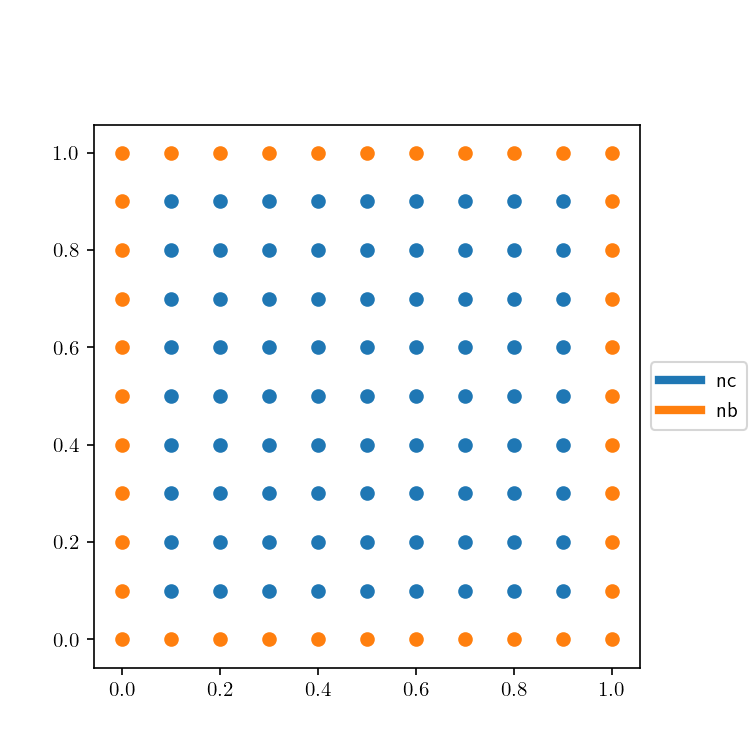

In [28]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.scatter([x for x,y in nc1], [y for x,y in nc1])
ax.scatter([x for x,y in nb1], [y for x,y in nb1])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.94, box.height * 0.94])

legend_elements = [Line2D([0], [0], color='C0', lw=4, label='nc'),
                   Line2D([0], [0], color='C1', lw=4, label='nb')]

ax.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("./pdf/testbed_small_domain.pdf")
plt.show()

<IPython.core.display.Javascript object>


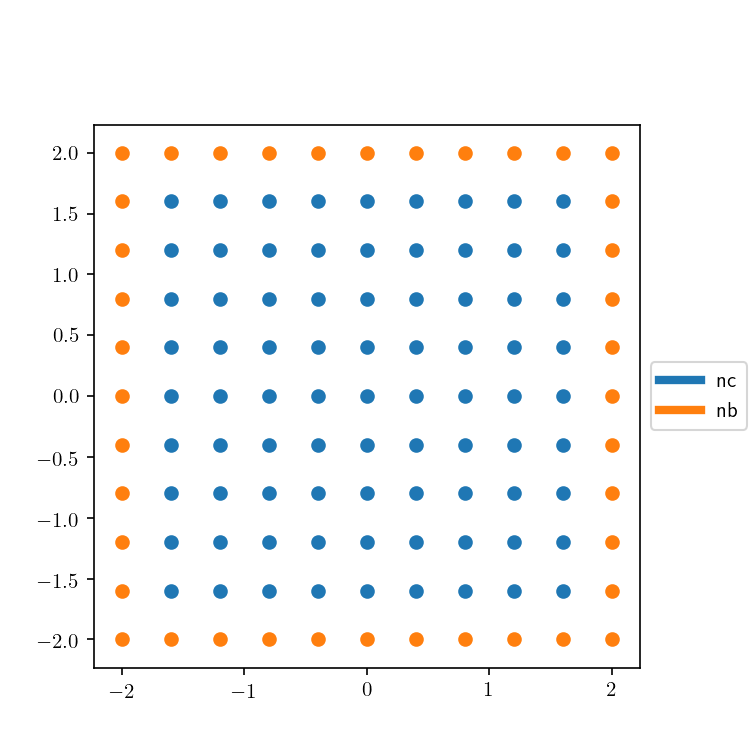

In [29]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.scatter([x for x,y in nc2], [y for x,y in nc2])
ax.scatter([x for x,y in nb2], [y for x,y in nb2])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.94, box.height * 0.94])

legend_elements = [Line2D([0], [0], color='C0', lw=4, label='nc'),
                   Line2D([0], [0], color='C1', lw=4, label='nb')]

ax.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("./pdf/testbed_big_domain.pdf")
plt.show()